## Lab 1: Sparse optimization of linear models (30 pts) 

### Question (a) -- see report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,-2,-1,-1,1], \
              [2, -1, 2, 0, -2],\
              [-1, 0, 2, 2, 1]]).reshape(3,5)
y = np.array([7, 1, 1]).reshape(3,1)
W_0 = np.zeros((5,1))
LR = 0.02
STPES = 200

### Question (b)


In [3]:
W = W_0
l_weight = []
l_loss = []
for _ in range(STPES):
    l_weight.append(W)
    loss = np.sum((np.dot(X, W) - y)**2)
    l_loss.append(loss)
    W = W - 2 * LR * np.dot(X.T, (np.dot(X, W) - y))
    

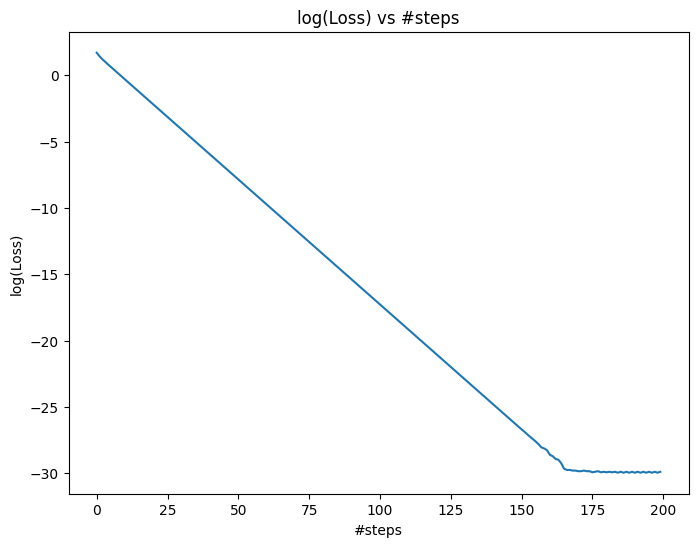

In [4]:
# plot log(L) vs step
plt.figure(figsize=(8,6))
plt.plot(np.log10(l_loss))
plt.xlabel('#steps')
plt.ylabel('log(Loss)')
plt.title('log(Loss) vs #steps')
plt.show()

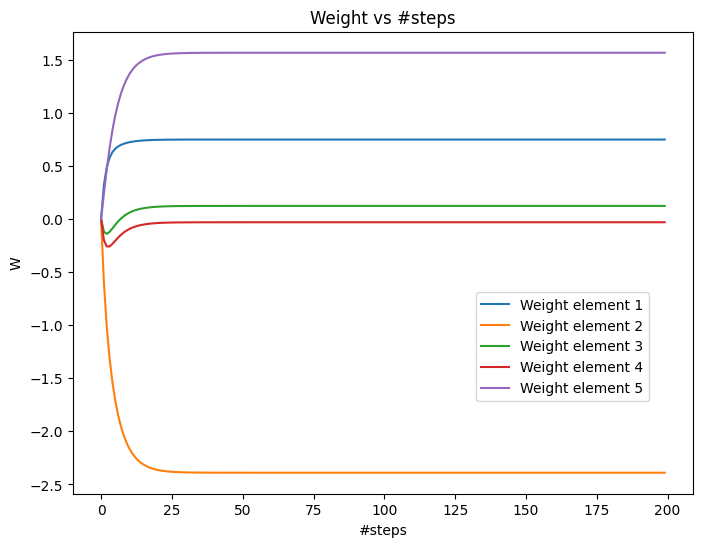

In [5]:
# plot each element in W vs step
l_W1 = [i for i in map(lambda x: x[0], l_weight)]
l_W2 = [i for i in map(lambda x: x[1], l_weight)]
l_W3 = [i for i in map(lambda x: x[2], l_weight)]
l_W4 = [i for i in map(lambda x: x[3], l_weight)]
l_W5 = [i for i in map(lambda x: x[4], l_weight)]

plt.figure(figsize=(8,6))
plt.plot(l_W1, label='Weight element 1')
plt.plot(l_W2, label='Weight element 2')
plt.plot(l_W3, label='Weight element 3')
plt.plot(l_W4, label='Weight element 4')
plt.plot(l_W5, label='Weight element 5')
plt.xlabel('#steps')
plt.ylabel('W')
plt.title('Weight vs #steps')
plt.legend(loc = [0.65,0.2])
plt.show()

### Qustion (c) 

Since we have the knowledge that the ground-truth weight should have ||W ||0 ≤ 2, we can apply projected gradient descent to enforce this sparse constraint. Redo the optimization process in (b), this time prune the elements in W after every gradient descent step to ensure ||Wl||0 ≤ 2. Plot the value of log(L) throughout the training and use another figure to plot the value of each element in W in each step. From your result, is W converging to an optimal solution? Is W converging to a sparse solution? 

In [6]:
W = W_0
l_weight = []
l_loss = []
for _ in range(STPES):
    l_weight.append(W)
    loss = np.sum((np.dot(X, W) - y)**2)
    l_loss.append(loss)
    W = W - 2 * LR * np.dot(X.T, (np.dot(X, W) - y))
    # if non zero element in W is more than 2
    if np.count_nonzero(W) > 2:
        sorted_indices = np.argsort(np.abs(W.ravel()), axis=0)
        # set the W where sorted_indices is 2,3,4 to 0
        W[sorted_indices[:3]] = 0
    

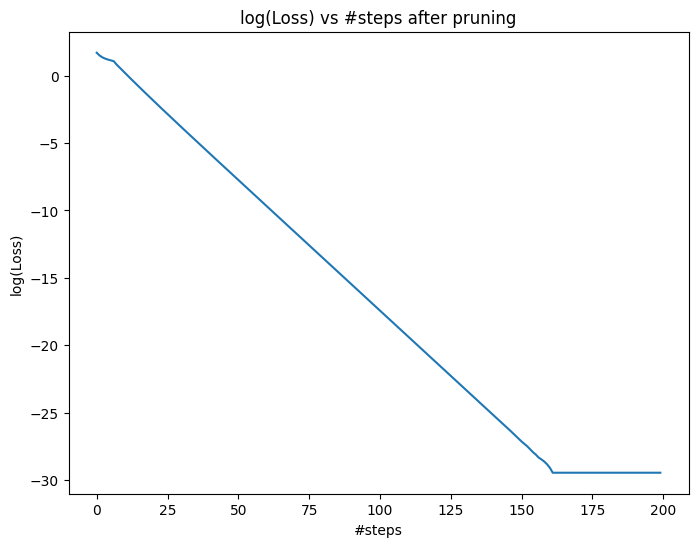

In [7]:
# plot log(L) vs step
plt.figure(figsize=(8,6))
plt.plot(np.log10(l_loss))
plt.xlabel('#steps')
plt.ylabel('log(Loss)')
plt.title('log(Loss) vs #steps after pruning')
plt.show()

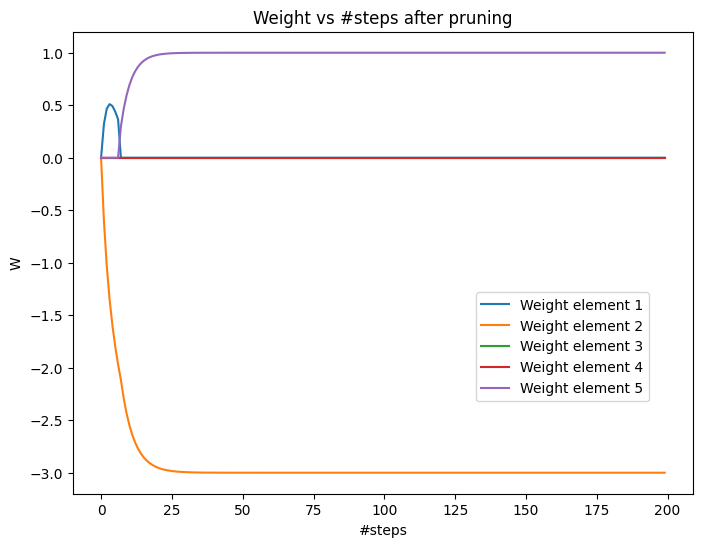

In [8]:
# plot each element in W vs step
l_W1 = [i for i in map(lambda x: x[0], l_weight)]
l_W2 = [i for i in map(lambda x: x[1], l_weight)]
l_W3 = [i for i in map(lambda x: x[2], l_weight)]
l_W4 = [i for i in map(lambda x: x[3], l_weight)]
l_W5 = [i for i in map(lambda x: x[4], l_weight)]

plt.figure(figsize=(8,6))
plt.plot(l_W1, label='Weight element 1')
plt.plot(l_W2, label='Weight element 2')
plt.plot(l_W3, label='Weight element 3')
plt.plot(l_W4, label='Weight element 4')
plt.plot(l_W5, label='Weight element 5')
plt.xlabel('#steps')
plt.ylabel('W')
plt.title('Weight vs #steps after pruning')
plt.legend(loc = [0.65,0.2])
plt.show()

### Question (d)

In this problem we apply l1 regularization to induce the sparse solution. The minimization objective therefore changes to L + λ||W ||1. Please use full-batch gradient descent to minimize this objective, with λ = {0.2, 0.5, 1.0, 2.0} respectively. For each case, plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. From your result, comment on the convergence performance under different λ. 

In [9]:
lambdas = [0.2, 0.5, 1, 2]

In [10]:
loss_all_lambda = []
weight_all_lambda = []
for l in lambdas:
    W = W_0
    l_loss = []
    l_weight = []
    for _ in range(STPES):
        l_weight.append(W)
        loss = np.sum((np.dot(X, W) - y)**2)
        l_loss.append(loss)
        gr = 2 * np.dot(X.T, (np.dot(X, W) - y)) + l * np.sign(W)
        W = W - LR * gr
    loss_all_lambda.append(l_loss)
    weight_all_lambda.append(l_weight)


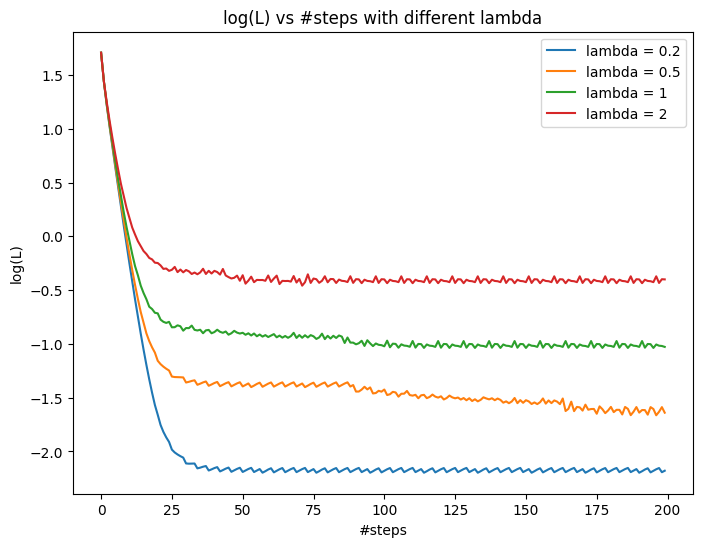

In [11]:
# plot all log(L) vs step
plt.figure(figsize=(8,6))
plt.plot(np.log10(loss_all_lambda[0]), label='lambda = 0.2')
plt.plot(np.log10(loss_all_lambda[1]), label='lambda = 0.5')
plt.plot(np.log10(loss_all_lambda[2]), label='lambda = 1')
plt.plot(np.log10(loss_all_lambda[3]), label='lambda = 2')
plt.xlabel('#steps')
plt.ylabel('log(L)')
plt.title('log(L) vs #steps with different lambda')
plt.legend(loc = 'best')
plt.show()

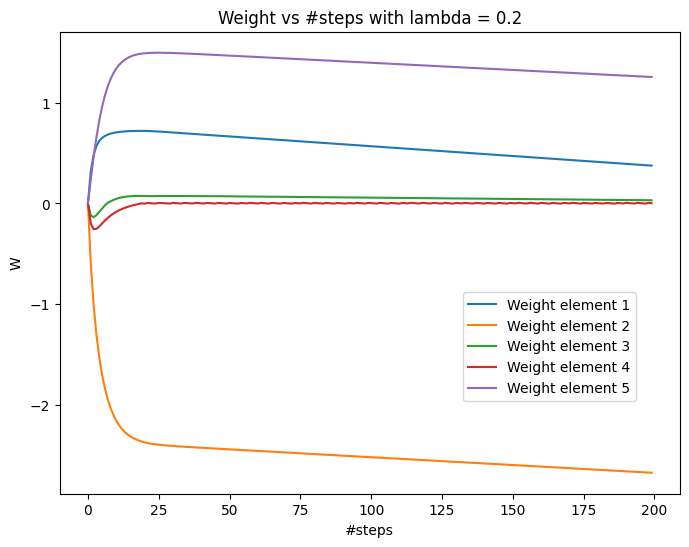

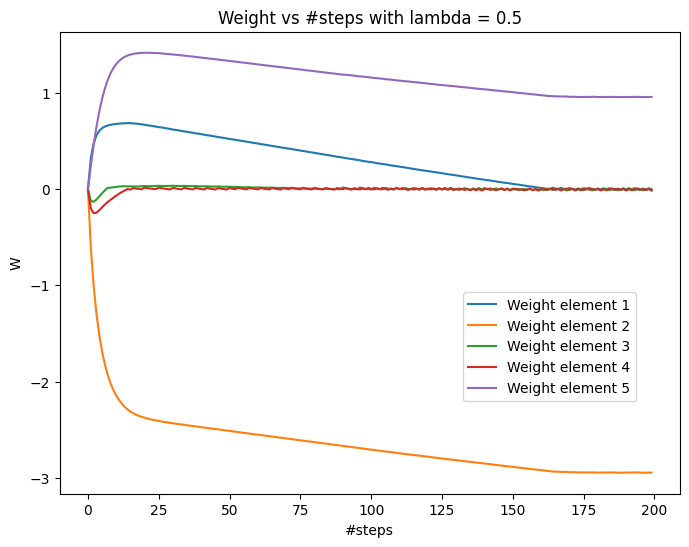

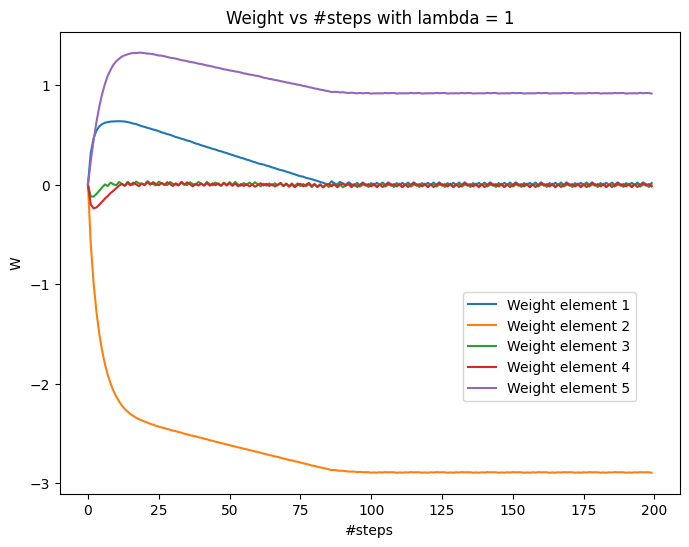

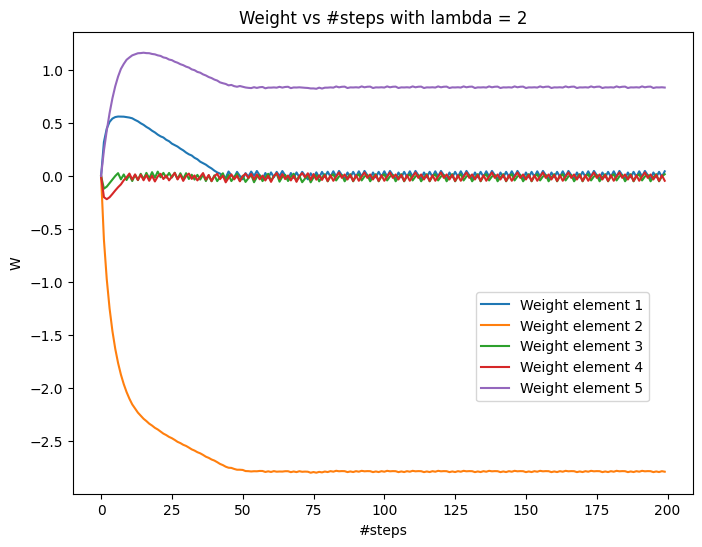

In [12]:
# plot each element in W vs step with different lambda
for l in lambdas:
    l_W1 = [i for i in map(lambda x: x[0], weight_all_lambda[lambdas.index(l)])]
    l_W2 = [i for i in map(lambda x: x[1], weight_all_lambda[lambdas.index(l)])]
    l_W3 = [i for i in map(lambda x: x[2], weight_all_lambda[lambdas.index(l)])]
    l_W4 = [i for i in map(lambda x: x[3], weight_all_lambda[lambdas.index(l)])]
    l_W5 = [i for i in map(lambda x: x[4], weight_all_lambda[lambdas.index(l)])]

    plt.figure(figsize=(8,6))
    plt.plot(l_W1, label='Weight element 1')
    plt.plot(l_W2, label='Weight element 2')
    plt.plot(l_W3, label='Weight element 3')
    plt.plot(l_W4, label='Weight element 4')
    plt.plot(l_W5, label='Weight element 5')
    plt.xlabel('#steps')
    plt.ylabel('W')
    plt.title('Weight vs #steps with lambda = {}'.format(l))
    plt.legend(loc = [0.65,0.2])
    plt.show()
    


### Question (e):

Here we optimize the same objective as in(d), this time using proximal gradient update. Recall that the proximal operator of the l1 regularizer is the soft thresholding function. Set the threshold in the soft thresholding function to {0.004, 0.01, 0.02, 0.04} respectively. Plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. Compare the convergence performance with the results in (d). (Hint: Optimizing L + λ||W ||1 using gradient descent with learning rate μ should correspond to proximal gradient update with threshold μλ) 

In [13]:
thresholds = [0.004, 0.01, 0.02, 0.04]
lambdas = [0.2, 0.5, 1, 2]

In [14]:
def soft_thresholding(theta, lamda):
    if theta > lamda:
        return theta - lamda
    elif theta < -lamda:
        return theta + lamda
    else:
        return 0

In [15]:
loss_all_lambda = []
weight_all_lambda = []
for i in range(len(lambdas)):
    W = W_0
    l_loss = []
    l_weight = []
    for _ in range(STPES):
        l_weight.append(W)
        loss = np.sum((np.dot(X, W) - y)**2)
        l_loss.append(loss)
        # gr = 2 * np.dot(X.T, (np.dot(X, W) - y)) + lambdas[i] * np.sign(W)  # do we add regularization term here?
        gr = 2 * np.dot(X.T, (np.dot(X, W) - y))  
        W = W - LR * gr
        for j in range(len(W)):
            W[j] = soft_thresholding(W[j], thresholds[i])
    loss_all_lambda.append(l_loss)
    weight_all_lambda.append(l_weight)

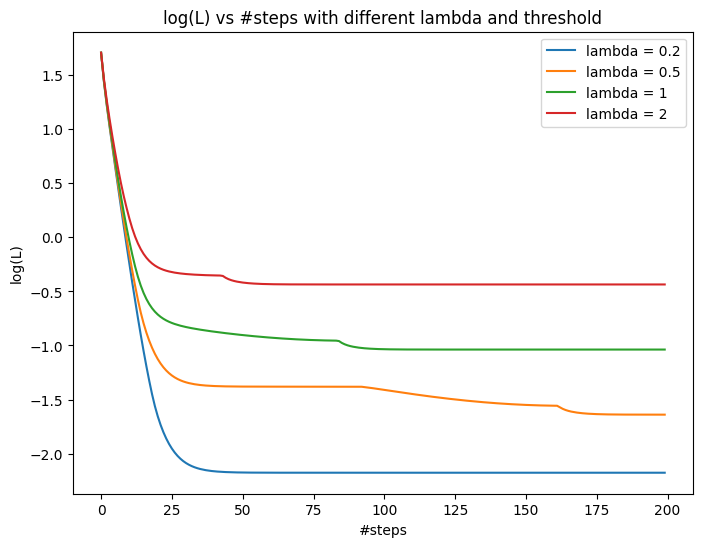

In [16]:
# plot all log(L) vs step
plt.figure(figsize=(8,6))
plt.plot(np.log10(loss_all_lambda[0]), label='lambda = 0.2')
plt.plot(np.log10(loss_all_lambda[1]), label='lambda = 0.5')
plt.plot(np.log10(loss_all_lambda[2]), label='lambda = 1')
plt.plot(np.log10(loss_all_lambda[3]), label='lambda = 2')
plt.xlabel('#steps')
plt.ylabel('log(L)')
plt.title('log(L) vs #steps with different lambda and threshold')
plt.legend(loc = 'best')
plt.show()


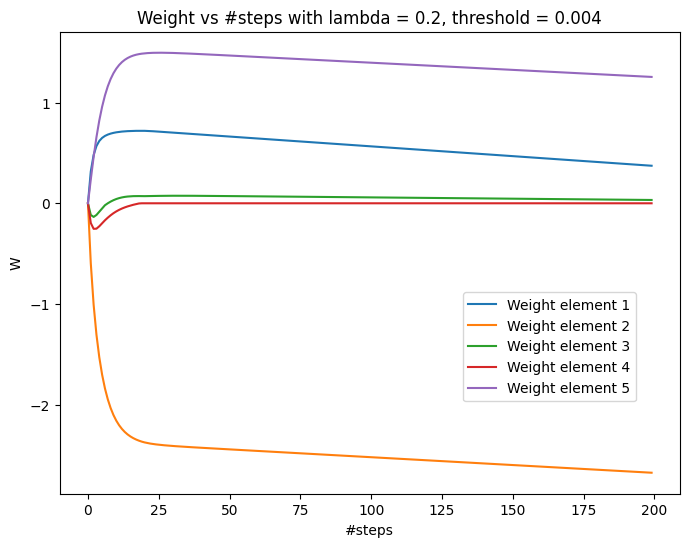

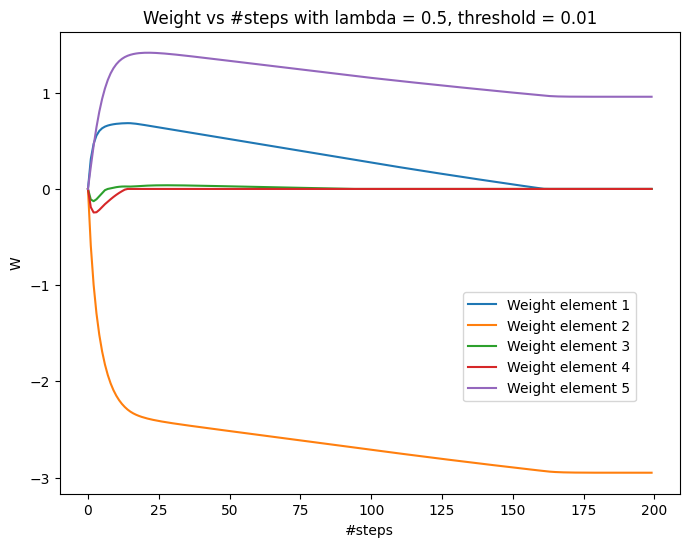

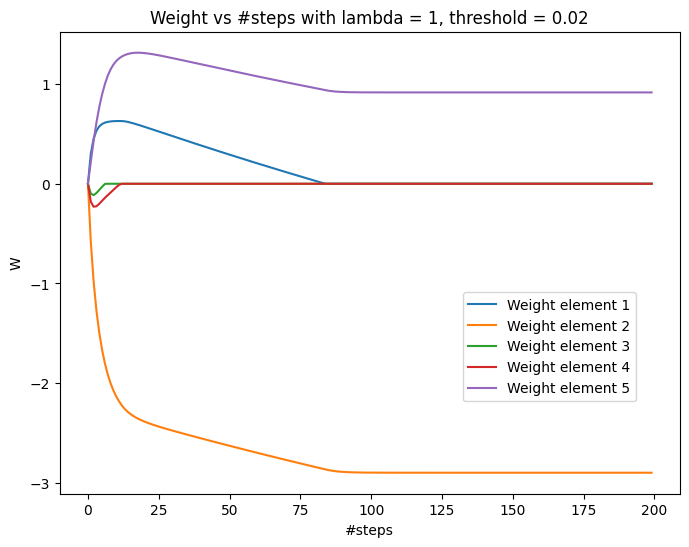

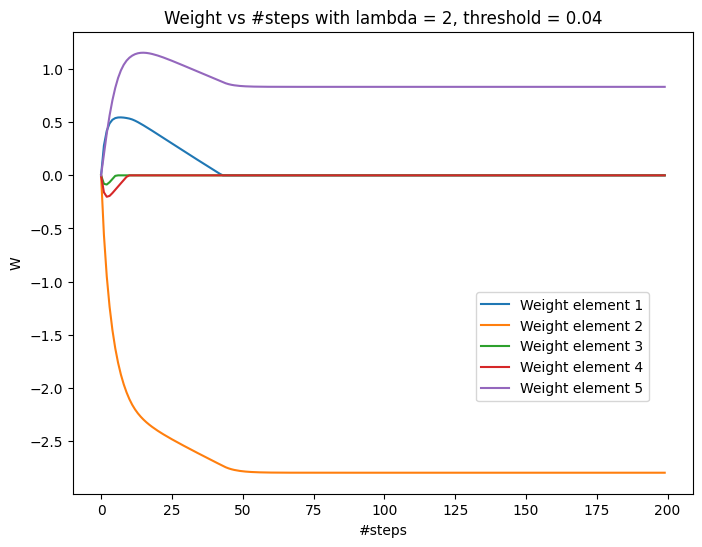

In [17]:
# plot each element in W vs step with different lambda
for l in lambdas:
    l_W1 = [i for i in map(lambda x: x[0], weight_all_lambda[lambdas.index(l)])]
    l_W2 = [i for i in map(lambda x: x[1], weight_all_lambda[lambdas.index(l)])]
    l_W3 = [i for i in map(lambda x: x[2], weight_all_lambda[lambdas.index(l)])]
    l_W4 = [i for i in map(lambda x: x[3], weight_all_lambda[lambdas.index(l)])]
    l_W5 = [i for i in map(lambda x: x[4], weight_all_lambda[lambdas.index(l)])]

    plt.figure(figsize=(8,6))
    plt.plot(l_W1, label='Weight element 1')
    plt.plot(l_W2, label='Weight element 2')
    plt.plot(l_W3, label='Weight element 3')
    plt.plot(l_W4, label='Weight element 4')
    plt.plot(l_W5, label='Weight element 5')
    plt.xlabel('#steps')
    plt.ylabel('W')
    plt.title('Weight vs #steps with lambda = {}, threshold = {}'.format(l, thresholds[lambdas.index(l)]))
    plt.legend(loc = [0.65,0.2])
    plt.show()

### Question (f): 

Trimmed l1 (Tl1) regularizer is proposed to solve the “bias” problem of l1. For simplicity you may implement the T l1 regularizer as applying a l1 regularization with strength λ on the 3 elements of W with the smallest absolute value, with no penalty on other elements. Minimize L + λT l1 (W ) using proximal gradient update with λ = {1.0, 2.0, 5.0, 10.0} (correspond the soft thresholding threshold {0.02, 0.04, 0.1, 0.2}). Plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. Comment on the convergence comparison of the Trimmed l1 and the l1. Also compare the behavior of the early steps (e.g. first 20) between the Trimmed l1 and the iterative pruning. 

In [18]:
lambdas = [1, 2, 5, 10]
thresholds = [0.02, 0.04, 0.1, 0.2]

In [19]:
loss_all_lambda = []
weight_all_lambda = []
for l in range(len(lambdas)):
    W = W_0
    l_loss = []
    l_weight = []
    for _ in range(STPES):
        l_weight.append(W)
        loss = np.sum((np.dot(X, W) - y)**2)
        l_loss.append(loss)
        gr = 2 * np.dot(X.T, (np.dot(X, W) - y)) 
        W = W - LR * gr
        # trim the 3 elements with smallest absolute value to soft thresholding
        smallest_indices = np.argsort(np.abs(W.ravel()), axis=0)[:3]
        for i in smallest_indices:
            W[i] = soft_thresholding(W[i], thresholds[l])
    loss_all_lambda.append(l_loss)
    weight_all_lambda.append(l_weight)

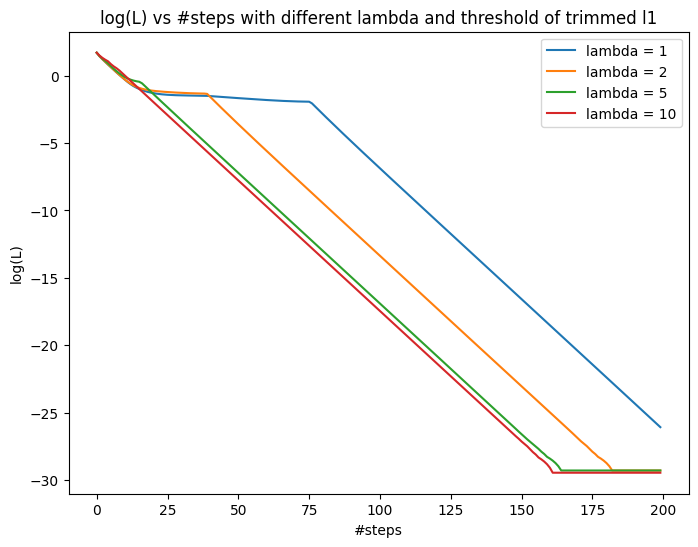

In [20]:
# plot
plt.figure(figsize=(8,6))
plt.plot(np.log10(loss_all_lambda[0]), label='lambda = 1')
plt.plot(np.log10(loss_all_lambda[1]), label='lambda = 2')
plt.plot(np.log10(loss_all_lambda[2]), label='lambda = 5')
plt.plot(np.log10(loss_all_lambda[3]), label='lambda = 10')
plt.xlabel('#steps')
plt.ylabel('log(L)')
plt.title('log(L) vs #steps with different lambda and threshold of trimmed l1')
plt.legend(loc = 'best')
plt.show()


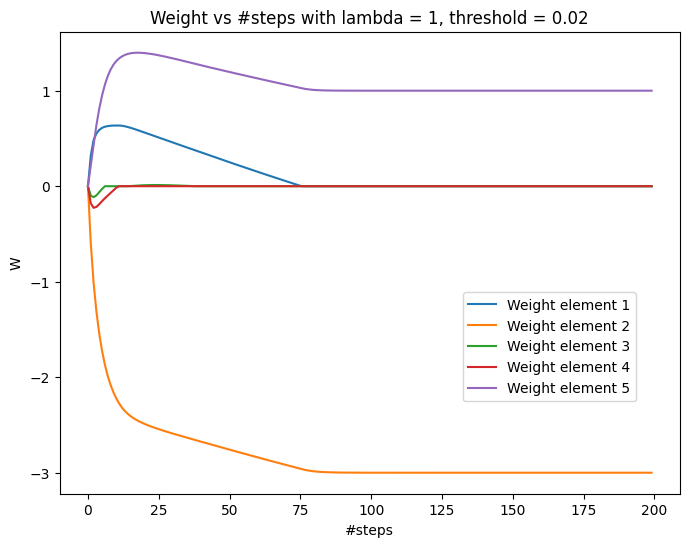

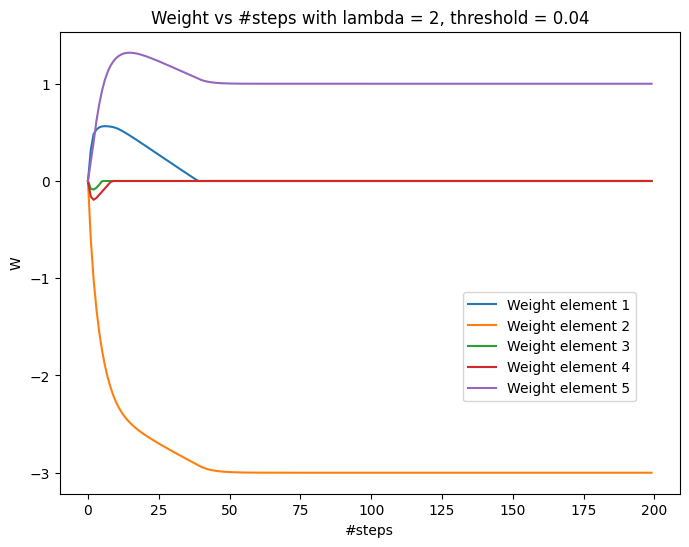

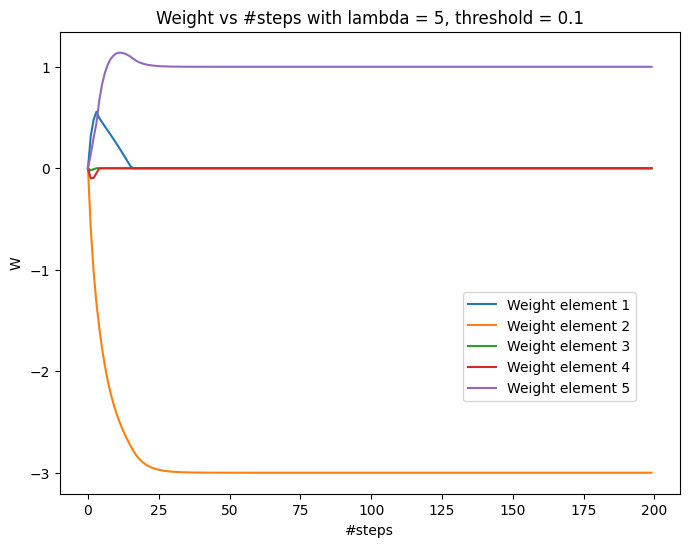

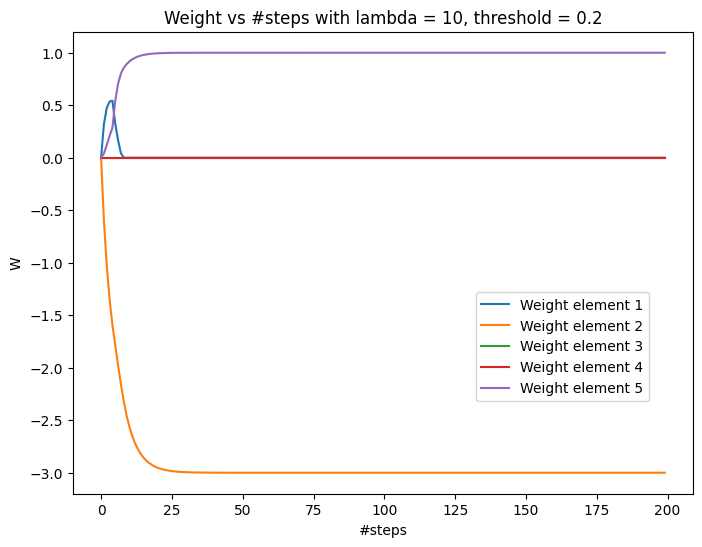

In [21]:
# plot weights
for i in range(len(lambdas)):
    l_W1 = [i for i in map(lambda x: x[0], weight_all_lambda[i])]
    l_W2 = [i for i in map(lambda x: x[1], weight_all_lambda[i])]
    l_W3 = [i for i in map(lambda x: x[2], weight_all_lambda[i])]
    l_W4 = [i for i in map(lambda x: x[3], weight_all_lambda[i])]
    l_W5 = [i for i in map(lambda x: x[4], weight_all_lambda[i])]

    plt.figure(figsize=(8,6))
    plt.plot(l_W1, label='Weight element 1')
    plt.plot(l_W2, label='Weight element 2')
    plt.plot(l_W3, label='Weight element 3')
    plt.plot(l_W4, label='Weight element 4')
    plt.plot(l_W5, label='Weight element 5')
    plt.xlabel('#steps')
    plt.ylabel('W')
    plt.title('Weight vs #steps with lambda = {}, threshold = {}'.format(lambdas[i], thresholds[i]))
    plt.legend(loc = [0.65,0.2])
    plt.show()